# Challenge : advance regression

Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

Record your work and reflections in a notebook to discuss with your mentor.

In [1]:
#importing modules
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import collections
import statsmodels.stats.proportion
import math
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf

from IPython.display import display
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Import Data Set
df_offense_ca = pd.read_excel('C:/Users/catan/Downloads/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls')
df_offense_ca

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,CALIFORNIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
4,Adelanto,31165,198,2,NaN,15,52,129,886,381,372,133,17
5,Agoura Hills,20762,19,0,NaN,2,10,7,306,109,185,12,7
6,Alameda,76206,158,0,NaN,10,85,63,1902,287,1285,330,17
7,Albany,19104,29,0,NaN,1,24,4,557,94,388,75,7
8,Alhambra,84710,163,1,NaN,9,81,72,1774,344,1196,234,7
9,Aliso Viejo,50005,25,0,NaN,2,4,19,315,71,224,20,3


In [3]:
df_offense_ca.shape

(468, 13)

In [4]:
df_offense_ca.index

RangeIndex(start=0, stop=468, step=1)

In [5]:
df_offense_ca.loc[3,:]

Table 8                                          City
Unnamed: 1                                 Population
Unnamed: 2                             Violent\ncrime
Unnamed: 3     Murder and\nnonnegligent\nmanslaughter
Unnamed: 4               Rape\n(revised\ndefinition)1
Unnamed: 5                Rape\n(legacy\ndefinition)2
Unnamed: 6                                    Robbery
Unnamed: 7                        Aggravated\nassault
Unnamed: 8                            Property\ncrime
Unnamed: 9                                   Burglary
Unnamed: 10                           Larceny-\ntheft
Unnamed: 11                     Motor\nvehicle\ntheft
Unnamed: 12                                     Arson
Name: 3, dtype: object

In [6]:
list(df_offense_ca.loc[3,:])

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson']

In [7]:
df_offense_ca.columns = ['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson']

In [8]:
df_offense_ca.columns = ['city', 'pop', 'violent_crime',
       'murder',
       'rape_1', 'rape_2',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mot_veh_theft', 'arson']

In [9]:
#column rape_1 is mostly empty, we delete it
df_offense_ca = df_offense_ca.drop(['rape_1'], axis=1)


In [10]:
df_offense_ca = df_offense_ca.drop(0)
df_offense_ca = df_offense_ca.drop(1)
df_offense_ca = df_offense_ca.drop(2)
df_offense_ca = df_offense_ca.drop(3)
df_offense_ca = df_offense_ca[:-2]

In [11]:
#convert some object to integers or float
for i in range(0, len(df_offense_ca.columns)):
    df_offense_ca.iloc[:, i] = pd.to_numeric(df_offense_ca.iloc[:, i], errors= 'ignore')


In [12]:
df_offense_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 4 to 465
Data columns (total 12 columns):
city              462 non-null object
pop               462 non-null int64
violent_crime     462 non-null int64
murder            462 non-null int64
rape_2            462 non-null int64
robbery           462 non-null int64
agg_assault       462 non-null int64
property_crime    462 non-null int64
burglary          462 non-null int64
larceny_theft     462 non-null int64
mot_veh_theft     462 non-null int64
arson             462 non-null int64
dtypes: int64(11), object(1)
memory usage: 46.9+ KB


In [13]:
df_offense_ca.fillna((df_offense_ca.mean()), inplace=True)


In [14]:
df_offense_ca=df_offense_ca.reset_index(drop=True)
df_offense_ca.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17
3,Albany,19104,29,0,1,24,4,557,94,388,75,7
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7


In [15]:
crimedata = list(df_offense_ca.loc[:,'violent_crime':])
df_offense_ca['total_crimes'] = df_offense_ca[crimedata].sum(axis = 1)
df_offense_ca['crime_per_city'] = df_offense_ca['total_crimes'] / df_offense_ca['pop']
df_offense_ca['crime_per_city'].argmax()

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


187

In [16]:
crimedata

['violent_crime',
 'murder',
 'rape_2',
 'robbery',
 'agg_assault',
 'property_crime',
 'burglary',
 'larceny_theft',
 'mot_veh_theft',
 'arson']

In [17]:
df_offense_ca['total_crimes'] = df_offense_ca[crimedata].sum(axis = 1)
df_offense_ca['total_crimes'] 

0      2185
1       657
2      4137
3      1179
4      3881
       ... 
457     116
458     656
459    4324
460    2079
461    1032
Name: total_crimes, Length: 462, dtype: int64

In [18]:
df_offense_ca[crimedata].sum(axis = 1)

0      2185
1       657
2      4137
3      1179
4      3881
       ... 
457     116
458     656
459    4324
460    2079
461    1032
Length: 462, dtype: int64

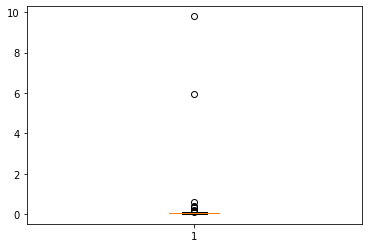

In [19]:
plt.boxplot(df_offense_ca['crime_per_city'])
plt.show()

In [20]:
df_offense_ca.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson,total_crimes,crime_per_city
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17,2185,0.070
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7,657,0.032
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17,4137,0.054
3,Albany,19104,29,0,1,24,4,557,94,388,75,7,1179,0.062
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7,3881,0.046


In [21]:
df_offense_ca=df_offense_ca[df_offense_ca['crime_per_city']<2]

In [22]:
df_offense_ca.ix[df_offense_ca['crime_per_city'].argmax()]


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


city              Sand City
pop                     344
violent_crime             3
murder                    0
rape_2                    0
robbery                   0
agg_assault               3
property_crime           99
burglary                 14
larceny_theft            81
mot_veh_theft             4
arson                     0
total_crimes            204
crime_per_city        0.593
Name: 352, dtype: object

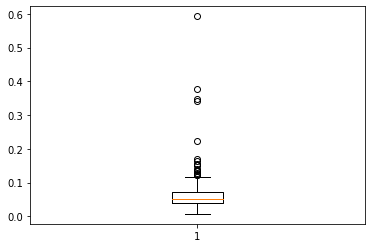

In [23]:
plt.boxplot(df_offense_ca['crime_per_city'])
plt.show()

In [24]:
df_offense_ca[df_offense_ca['crime_per_city']>1].index

Int64Index([], dtype='int64')

In [25]:
df_offense_ca['crime_per_city'].describe()

count   460.000
mean      0.061
std       0.045
min       0.007
25%       0.038
50%       0.052
75%       0.071
max       0.593
Name: crime_per_city, dtype: float64

In [26]:
#Not Safe City
df_offense_ca[df_offense_ca['crime_per_city']>=0.059].crime_per_city.count()

183

In [27]:
#Safe City
df_offense_ca[df_offense_ca['crime_per_city']<0.059].crime_per_city.count()

277

In [28]:
df_offense_ca["safe_city"] = np.where(df_offense_ca['crime_per_city']<0.059, 1, 0 )

In [29]:
df_offense_ca.head()

,city,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson,total_crimes,crime_per_city,safe_city
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17,2185,0.070,0
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7,657,0.032,1
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17,4137,0.054,1
3,Albany,19104,29,0,1,24,4,557,94,388,75,7,1179,0.062,0
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7,3881,0.046,1


In [30]:
df_ca_scale = df_offense_ca.loc[:, 'pop':]
df_ca_scale.head()

,pop,violent_crime,murder,rape_2,robbery,agg_assault,property_crime,burglary,larceny_theft,mot_veh_theft,arson,total_crimes,crime_per_city,safe_city
0,31165,198,2,15,52,129,886,381,372,133,17,2185,0.070,0
1,20762,19,0,2,10,7,306,109,185,12,7,657,0.032,1
2,76206,158,0,10,85,63,1902,287,1285,330,17,4137,0.054,1
3,19104,29,0,1,24,4,557,94,388,75,7,1179,0.062,0
4,84710,163,1,9,81,72,1774,344,1196,234,7,3881,0.046,1


## logistic regression classifier

In [31]:
from sklearn.model_selection import train_test_split
y = df_offense_ca['safe_city']
X = df_offense_ca[crimedata]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns = crimedata))

print('\Intercept:{}'.format(fit.intercept_))

print("\n Percentage accuracy training set")
print(lr.score(X_train, y_train))

print("\n Percentage Accuray Testing set")
print(lr.score(X_test, y_test))

pred_y_sklearn = lr.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   violent_crime  murder  rape_2  robbery  agg_assault  property_crime  \
0          0.005   0.025   0.004   -0.014       -0.009           0.000   

   burglary  larceny_theft  mot_veh_theft  arson  
0    -0.001         -0.001          0.002 -0.006  
\Intercept:[0.88011847]

 Percentage accuracy training set
0.6565217391304348

 Percentage Accuray Testing set
0.6869565217391305

 Accuracy City Safety on Test Set
safe_city   0    1
row_0             
0          31   17
1          55  127


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## LASSO Regression

In [33]:
crimedata

['violent_crime',
 'murder',
 'rape_2',
 'robbery',
 'agg_assault',
 'property_crime',
 'burglary',
 'larceny_theft',
 'mot_veh_theft',
 'arson']

In [34]:
from sklearn.model_selection import train_test_split
y = df_offense_ca['safe_city']
X = df_offense_ca[crimedata]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

lrlasso = LogisticRegression(penalty ='l1')
fit = lrlasso.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrlasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrlasso.score(X_test, y_test))

pred_y_sklearn = lrlasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))


Coefficients
   violent_crime  murder  rape_2  robbery  agg_assault  property_crime  \
0          0.000   0.035   0.025    0.003       -0.006          -0.000   

   burglary  larceny_theft  mot_veh_theft  arson  
0    -0.001         -0.000          0.001  0.012  

Intercept:[1.01989504]

 Percentage accuracy training set
0.6782608695652174

 Percentage accuracy testing set
0.6347826086956522

 Accuracy City Safety on Test Set
safe_city   0    1
row_0             
0          28   11
1          73  118


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Select features and add features to increase accuracy

In [35]:
df_offense_ca.columns

Index(['city', 'pop', 'violent_crime', 'murder', 'rape_2', 'robbery',
       'agg_assault', 'property_crime', 'burglary', 'larceny_theft',
       'mot_veh_theft', 'arson', 'total_crimes', 'crime_per_city',
       'safe_city'],
      dtype='object')

In [36]:
features= [ 'pop','violent_crime', 'murder', 'rape_2','mot_veh_theft', 'arson', 'crime_per_city']

In [37]:
from sklearn.model_selection import train_test_split
y = df_offense_ca['safe_city']
X = df_offense_ca[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

lrlasso = LogisticRegression(penalty ='l1')
fit = lrlasso.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=features))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrlasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrlasso.score(X_test, y_test))

pred_y_sklearn = lrlasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))


Coefficients
    pop  violent_crime  murder  rape_2  mot_veh_theft  arson  crime_per_city
0 0.000         -0.007   0.066  -0.041         -0.002 -0.015         -21.071

Intercept:[1.28292102]

 Percentage accuracy training set
0.8608695652173913

 Percentage accuracy testing set
0.8521739130434782

 Accuracy City Safety on Test Set
safe_city   0    1
row_0             
0          65    5
1          29  131


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Ridge Regression

## Select or add features to improve accuracy

In [39]:
features_ridge = ['pop','violent_crime',
 'rape_2',
 'robbery',
 'larceny_theft',
 'mot_veh_theft',
 'arson']

In [40]:
df_offense_ca.columns

Index(['city', 'pop', 'violent_crime', 'murder', 'rape_2', 'robbery',
       'agg_assault', 'property_crime', 'burglary', 'larceny_theft',
       'mot_veh_theft', 'arson', 'total_crimes', 'crime_per_city',
       'safe_city'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
y = df_offense_ca['safe_city']
X = df_offense_ca[features_ridge]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

lrridge = LogisticRegression(penalty ='l2')
fit = lrridge.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=features_ridge))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrridge.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrridge.score(X_test, y_test))

pred_y_sklearn = lrridge.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
    pop  violent_crime  rape_2  robbery  larceny_theft  mot_veh_theft  arson
0 0.001         -0.026  -0.003   -0.025         -0.027         -0.025 -0.036

Intercept:[0.003022]

 Percentage accuracy training set
0.9391304347826087

 Percentage accuracy testing set
0.9347826086956522

 Accuracy City Safety on Test Set
safe_city   0    1
row_0             
0          84    4
1          11  131


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
